## Observations and Insights 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_fulldata = pd.merge(mouse_metadata,study_results, on='Mouse ID',how='outer')

# Display the data table for preview
mouse_fulldata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [69]:
len(mouse_fulldata)

1893

In [2]:
# Checking the number of mice.
mouse_fulldata['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_fulldata[mouse_fulldata.duplicated(['Mouse ID','Timepoint'])]




In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_fulldata.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
cleandata_without_dupmouseid = clean_mouse_data[clean_mouse_data['Mouse ID']!='g989']
cleandata_without_dupmouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleandata_without_dupmouseid['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
working_mouse_data = pd.DataFrame(cleandata_without_dupmouseid)
data_groupby_regimen = working_mouse_data.groupby(['Drug Regimen'])

mean_tumor_volume = data_groupby_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = data_groupby_regimen['Tumor Volume (mm3)'].median()
var_tumor_volume = data_groupby_regimen['Tumor Volume (mm3)'].var()
std_tumor_volume = data_groupby_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = data_groupby_regimen['Tumor Volume (mm3)'].sem()

summary_data = {'mean_tumor_volume': mean_tumor_volume,
                'median_tumor_volume': median_tumor_volume,
                'var_tumor_volume': var_tumor_volume,
                'std_tumor_volume': std_tumor_volume,
                'sem_tumor_volume':sem_tumor_volume }

summary_stats_tv = pd.DataFrame(summary_data)
summary_stats_tv


,mean_tumor_volume,median_tumor_volume,var_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
data_groupby_regimen2 = working_mouse_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
data_groupby_regimen2

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
####df_data1 = working_mouse_data.groupby('Drug Regimen')['Mouse ID'].count()

#Getting unique list of mouse id for every Drug

dfuniq = working_mouse_data.drop_duplicates(subset=['Mouse ID','Drug Regimen'])
mice_cnt = dfuniq.groupby('Drug Regimen')['Mouse ID'].count()


df2 = pd.DataFrame(mice_cnt)
df2.columns = ['mice count']
df2.reset_index(level=0, inplace=True)
df2


,Drug Regimen,mice count
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


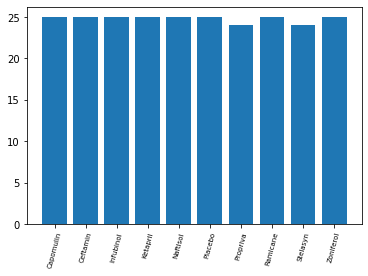

In [10]:
##Bar Graph

#index = np.arange(len(df2['Drug Regimen']))
index = np.array(df2['Drug Regimen'])
plt.bar(index, df2['mice count'])
#plt.xlabel('Drug Regimen', fontsize=8)
#plt.ylabel('Number of mice', fontsize=8)
plt.xticks(index, df2['Drug Regimen'], fontsize=7, rotation=75)
#plt.title('Total number of mice for each treatment')
plt.show()

<AxesSubplot:xlabel='Drug Regimen'>

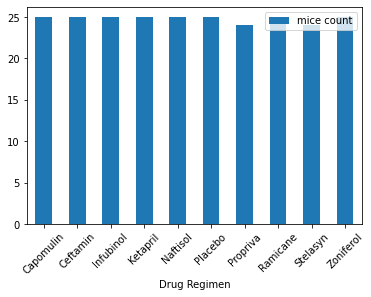

In [11]:
ax = df2.plot.bar(x='Drug Regimen', y='mice count', rot=45)
ax
#plt.savefig('bar_plot.png')
#plt.show()

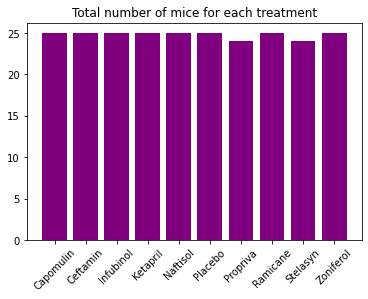

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Plot the data
f, ax = plt.subplots()

ax.bar(x=df2['Drug Regimen'],
       height=df2['mice count'],
       color="purple")

ax.set(title="Total number of mice for each treatment")
plt.xticks(rotation = 45)
plt.show()


In [18]:
# Generate datafram showing the distribution of female versus male mice 
mice_gender_df = cleandata_without_dupmouseid.drop_duplicates(subset=['Mouse ID','Sex'])
mice_gender_cnt_df = mice_gender_df.groupby('Sex')['Mouse ID'].count()
mice_gender_cnt_df


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [22]:
gender_cnt_df = pd.DataFrame(mice_gender_cnt_df)
gender_cnt_df.columns = ['mice count']
gender_cnt_df.reset_index(level=0, inplace=True)
gender_cnt_df2 = gender_cnt_df.set_index('Sex')
gender_cnt_df2

,mice count
Sex,
Female,123
Male,125


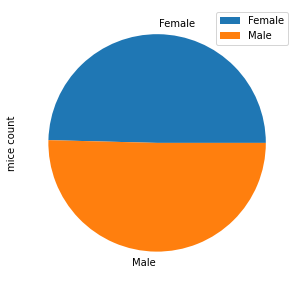

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas"
plot = gender_cnt_df2.plot.pie(y='mice count', figsize=(5, 5))

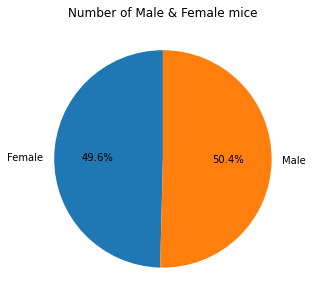

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender_cnt_df['mice count'], labels=gender_cnt_df['Sex'], startangle=90, autopct='%.1f%%')
plt.title("Number of Male & Female mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_timepoint= mouse_fulldata.groupby('Mouse ID').max()['Timepoint']
final_timepoint_df=pd.DataFrame(final_timepoint)
final_timepoint_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_study_df=pd.merge(final_timepoint_df, mouse_fulldata, on=('Mouse ID','Timepoint'))
merged_mouse_study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [77]:
#Get just tumor volume for Capomulin
capomulin_treatment_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=="Capomulin"]
#capomulin_treatment_df
capomulin_tumorvolume = capomulin_treatment_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
capomulin_quartiles = capomulin_tumorvolume.quantile([.25,.75])
capomulinq1 = capomulin_quartiles[.25]
capomulinq3 = capomulin_quartiles[.75]
capomulinqIQR = capomulinq3-capomulinq1
capomulinLowerBound = capomulinq1-(capomulinqIQR*1.5)
capomulinUpperBound = capomulinq3+(capomulinqIQR*1.5)

#Summary Stats Table
summary_df_capomulin = pd.DataFrame({
    "Capomulin Quartile 1":[capomulinq1],
    "Capomulin Quartile 3":[capomulinq3],
    "Capomulin IQR":[capomulinqIQR],
    "Capomulin Lower Bound":[capomulinLowerBound],
    "Capomulin Upper Bound":[capomulinUpperBound]
})
summary_df_capomulin

,Capomulin Quartile 1,Capomulin Quartile 3,Capomulin IQR,Capomulin Lower Bound,Capomulin Upper Bound
0,32.377357,40.15922,7.781863,20.704562,51.832015


In [76]:
#Get just tumor volume for Ramicane
Ramicane_treatment_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=="Ramicane"]
#Ramicane_treatment_df
Ramicane_tumorvolume = Ramicane_treatment_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
Ramicane_quartiles = Ramicane_tumorvolume.quantile([.25,.75])
Ramicaneq1 = Ramicane_quartiles[.25]
Ramicaneq3 = Ramicane_quartiles[.75]
RamicaneqIQR = Ramicaneq3-Ramicaneq1
RamicaneLowerBound = Ramicaneq1-(RamicaneqIQR*1.5)
RamicaneUpperBound = Ramicaneq3+(RamicaneqIQR*1.5)

#Summary Stats Table
summary_df_Ramicane = pd.DataFrame({
    "Ramicane Quartile 1":[Ramicaneq1],
    "Ramicane Quartile 3":[Ramicaneq3],
    "Ramicane IQR":[RamicaneqIQR],
    "Ramicane Lower Bound":[RamicaneLowerBound],
    "Ramicane Upper Bound":[RamicaneUpperBound]
})
summary_df_Ramicane

,Ramicane Quartile 1,Ramicane Quartile 3,Ramicane IQR,Ramicane Lower Bound,Ramicane Upper Bound
0,31.56047,40.659006,9.098537,17.912664,54.306811


In [80]:
#Get just tumor volume for Infubinol
Infubinol_treatment_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=="Infubinol"]
#Infubinol_treatment_df
Infubinol_tumorvolume = Infubinol_treatment_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
Infubinol_quartiles = Infubinol_tumorvolume.quantile([.25,.75])
Infubinolq1 = Infubinol_quartiles[.25]
Infubinolq3 = Infubinol_quartiles[.75]
InfubinolqIQR = Infubinolq3-Infubinolq1
InfubinolLowerBound = Infubinolq1-(InfubinolqIQR*1.5)
InfubinolUpperBound = Infubinolq3+(InfubinolqIQR*1.5)

#Summary Stats Table
summary_df_Infubinol = pd.DataFrame({
    "Infubinol Quartile 1":[Infubinolq1],
    "Infubinol Quartile 3":[Infubinolq3],
    "Infubinol IQR":[InfubinolqIQR],
    "Infubinol Lower Bound":[InfubinolLowerBound],
    "Infubinol Upper Bound":[InfubinolUpperBound]
})
summary_df_Infubinol

,Infubinol Quartile 1,Infubinol Quartile 3,Infubinol IQR,Infubinol Lower Bound,Infubinol Upper Bound
0,54.048608,65.525743,11.477135,36.832905,82.741446


In [81]:
#Get just tumor volume for Ceftamin
Ceftamin_treatment_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=="Ceftamin"]
#Ceftamin_treatment_df
Ceftamin_tumorvolume = Ceftamin_treatment_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
Ceftamin_quartiles = Ceftamin_tumorvolume.quantile([.25,.75])
Ceftaminq1 = Ceftamin_quartiles[.25]
Ceftaminq3 = Ceftamin_quartiles[.75]
CeftaminqIQR = Ceftaminq3-Ceftaminq1
CeftaminLowerBound = Ceftaminq1-(CeftaminqIQR*1.5)
CeftaminUpperBound = Ceftaminq3+(CeftaminqIQR*1.5)

#Summary Stats Table
summary_df_Ceftamin = pd.DataFrame({
    "Ceftamin Quartile 1":[Ceftaminq1],
    "Ceftamin Quartile 3":[Ceftaminq3],
    "Ceftamin IQR":[CeftaminqIQR],
    "Ceftamin Lower Bound":[CeftaminLowerBound],
    "Ceftamin Upper Bound":[CeftaminUpperBound]
})
summary_df_Ceftamin

,Ceftamin Quartile 1,Ceftamin Quartile 3,Ceftamin IQR,Ceftamin Lower Bound,Ceftamin Upper Bound
0,48.722078,64.29983,15.577752,25.35545,87.666458


<ipython-input-113-d37153332ad2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1f842e6a790>,
 'caps': [<matplotlib.lines.Line2D at 0x1f842ab3310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f842e6a880>,
 'medians': [<matplotlib.lines.Line2D at 0x1f842e78880>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f842e78310>,
 'means': []}

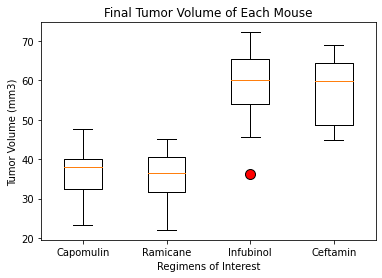

In [113]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Regimens of Interest")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
# Highlight any potential outliers in the plot by changing their color and style.
flierprops_capomulin = dict(marker = "o", markerfacecolor = "red", markersize = 10, markeredgecolor = "black")
# Combine our data into one variable to hold the four regimens of interest.
four_regimens = [capomulin_tumorvolume, Ramicane_tumorvolume, 
                 Infubinol_tumorvolume, Ceftamin_tumorvolume]
ax1.boxplot(four_regimens, flierprops = flierprops_capomulin)

## Line and Scatter Plots

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_mouse_df = mouse_fulldata.loc[mouse_fulldata["Drug Regimen"]=="Capomulin"]
capomulin_mouse_list = Capomulin_mouse_df['Mouse ID'].unique()
#print(capomulin_mouse_list)
##choosing random mouse ID from the list

rnd_mouse_id = random.choice(capomulin_mouse_list)
print(rnd_mouse_id)

#Capomulin_mouse_df
#getRandomMouseId = mouse_fulldata



l897


In [93]:
rnd_mouse_df = Capomulin_mouse_df.loc[Capomulin_mouse_df['Mouse ID']==rnd_mouse_id]
rnd_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
273,l897,Capomulin,Male,17,19,0,45.000000,0
274,l897,Capomulin,Male,17,19,5,45.462243,0
275,l897,Capomulin,Male,17,19,10,46.154737,0
276,l897,Capomulin,Male,17,19,15,44.061521,0
277,l897,Capomulin,Male,17,19,20,44.813093,0
278,l897,Capomulin,Male,17,19,25,45.354679,0
279,l897,Capomulin,Male,17,19,30,39.352792,1
280,l897,Capomulin,Male,17,19,35,37.682767,1
281,l897,Capomulin,Male,17,19,40,38.343902,1
282,l897,Capomulin,Male,17,19,45,38.846876,1


Text(0.5, 1.0, 'Mouse Tumor over time on Capomulin Regimen')

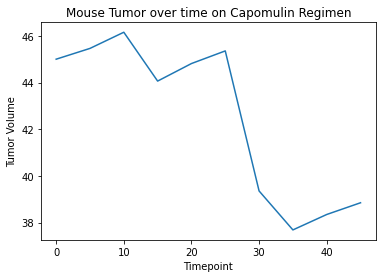

In [98]:
rnd_mouse_timepoint = rnd_mouse_df['Timepoint']
rnd_mouse_tumorvol = rnd_mouse_df['Tumor Volume (mm3)']

plt.plot(rnd_mouse_timepoint, rnd_mouse_tumorvol, label="tumor volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Mouse Tumor over time on Capomulin Regimen')

In [110]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_plot_df = Capomulin_mouse_df.groupby(["Drug Regimen", "Mouse ID"]).mean()
mouse_weight = scatter_plot_df['Weight (g)']
mouse_weight_list = mouse_weight.values.tolist()
#print(mouse_weight_list)

mouse_tumor = scatter_plot_df['Tumor Volume (mm3)']

mouse_tumor_list = mouse_tumor.values.tolist()
#mouse_tumor_list


## Correlation and Regression

The correlation between both factors is 0.84.


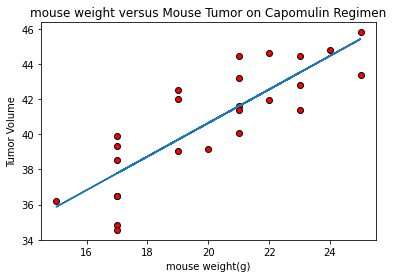

In [111]:
plt.scatter(mouse_weight_list, mouse_tumor_list, marker = "o", facecolors = "red", edgecolors = "black")

plt.xlabel('mouse weight(g)')
plt.ylabel('Tumor Volume')
plt.title('mouse weight versus Mouse Tumor on Capomulin Regimen')

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = scatter_plot_df.loc[:, "Weight (g)"]
y = scatter_plot_df.loc[:, "Tumor Volume (mm3)"]
correlation_coefficient = st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation_coefficient[0],2)}.")
# Plot the linear regression model on top of the previous scatter plot.
y_slope, y_int, y_r, y_p, y_std_err = st.linregress(x, y)
y_fit = y_slope * x + y_int
plt.plot(x,y_fit)